<a href="https://colab.research.google.com/github/soham-madrewar/FODIP-Assignment-/blob/main/fdip4_f055.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving stroberry.jpg to stroberry.jpg
Uploaded: stroberry.jpg


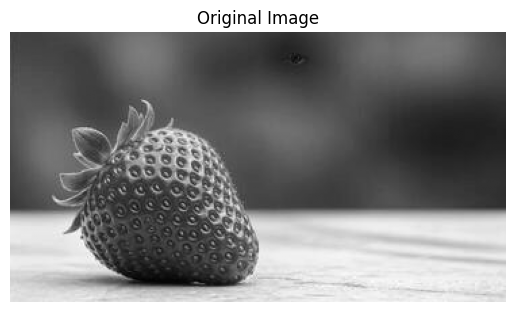

In [3]:
from google.colab import files
uploaded = files.upload()

import cv2
import numpy as np
from skimage import util, img_as_ubyte
import matplotlib.pyplot as plt

# Get uploaded filename
image_path = list(uploaded.keys())[0]
print("Uploaded:", image_path)

# Read image in grayscale
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()


In [4]:
def add_gaussian_noise(image, mean=0, var=20):
    row, col = image.shape
    sigma = var ** 0.5
    gauss = np.random.normal(mean, sigma, (row, col))
    noisy = image + gauss
    noisy = np.clip(noisy, 0, 255).astype(np.uint8)
    return noisy


In [5]:
def add_salt_pepper_noise(image, prob=0.02):
    output = np.copy(image)
    black = 0
    white = 255
    probs = np.random.rand(*image.shape)

    output[probs < (prob / 2)] = black
    output[probs > 1 - (prob / 2)] = white
    return output

In [6]:
def add_impulse_noise(image, prob=0.05):
    output = np.copy(image)
    probs = np.random.rand(*image.shape)
    output[probs < prob] = np.random.randint(0, 256)  # random impulse values
    return output


In [7]:
gaussian_img = add_gaussian_noise(img)
sp_img = add_salt_pepper_noise(img)
impulse_img = add_impulse_noise(img)


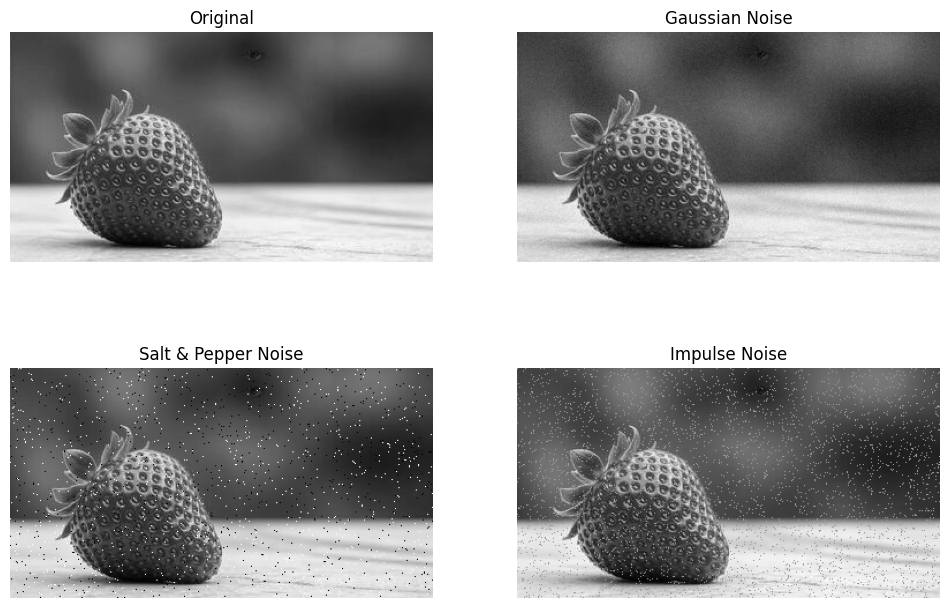

In [8]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1), plt.imshow(img, cmap='gray'), plt.title("Original"), plt.axis("off")
plt.subplot(2,2,2), plt.imshow(gaussian_img, cmap='gray'), plt.title("Gaussian Noise"), plt.axis("off")
plt.subplot(2,2,3), plt.imshow(sp_img, cmap='gray'), plt.title("Salt & Pepper Noise"), plt.axis("off")
plt.subplot(2,2,4), plt.imshow(impulse_img, cmap='gray'), plt.title("Impulse Noise"), plt.axis("off")

plt.show()

/tmp/ipython-input-3169328771.py:3: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.subplot(2,2,1), plt.hist(img.ravel(), 256, [0,256]), plt.title("Original Histogram")
/tmp/ipython-input-3169328771.py:4: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.subplot(2,2,2), plt.hist(gaussian_img.ravel(), 256, [0,256]), plt.title("Gaussian Noise Histogram")
/tmp/ipython-input-3169328771.py:5: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.subplot(2,2,3), plt.hist(sp_img.ravel(), 256, [0,256]), plt.title("Salt & Pepper Noise Histogram")
/tmp/ipython-input-3169328771.py:6: MatplotlibDeprecationWarning: Passing the range parameter o

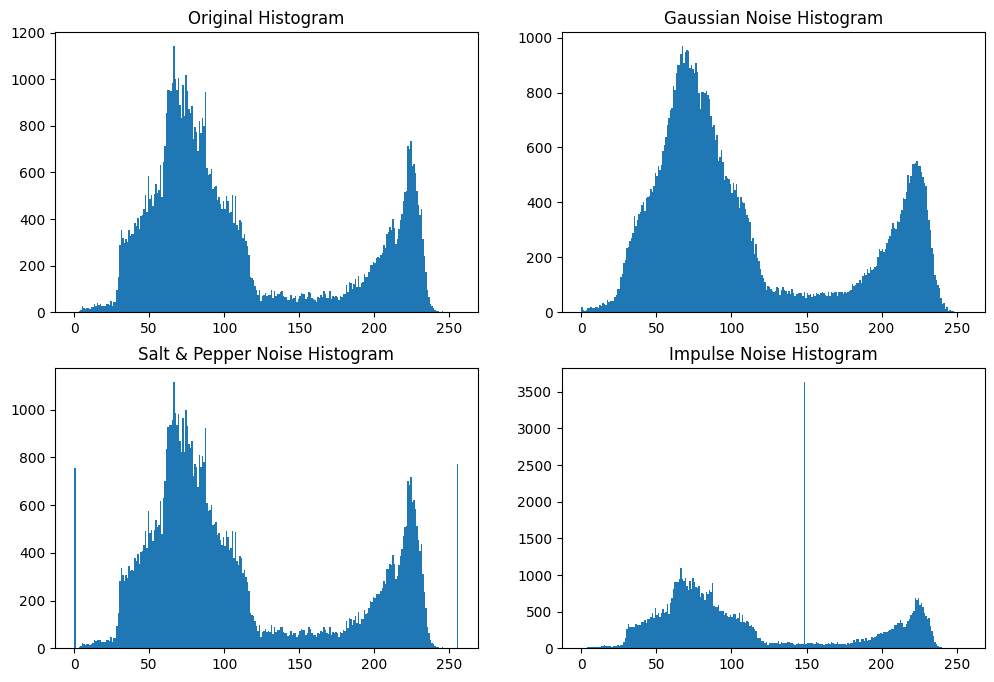

In [9]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1), plt.hist(img.ravel(), 256, [0,256]), plt.title("Original Histogram")
plt.subplot(2,2,2), plt.hist(gaussian_img.ravel(), 256, [0,256]), plt.title("Gaussian Noise Histogram")
plt.subplot(2,2,3), plt.hist(sp_img.ravel(), 256, [0,256]), plt.title("Salt & Pepper Noise Histogram")
plt.subplot(2,2,4), plt.hist(impulse_img.ravel(), 256, [0,256]), plt.title("Impulse Noise Histogram")

plt.show()
